<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Importing libraries</h1>
</div>

In [1]:
#================================================== Preprocessing libraries =============================================
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import time

#================================================== Statistical libraries ===============================================
import numpy as np
import scipy.stats as stats

# =============================================== Visualization libraries ================================================
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
from sklearn.tree import plot_tree

#=========================================================== EDA Tool ======================================================
from ydata_profiling import ProfileReport

#===================================================ML MODELS==============================================================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import pickle

#================================================= Hyperparameter Tuning libraries ============================================
from sklearn.model_selection import GridSearchCV

#=============================================== Models evauluation metric libraries ==========================================
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix

#===============================================Pipeline libraries===============================================
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Importing Data

In [2]:
dataset = pd.read_csv('dataset/credit_risk_dataset.csv')
print(dataset.shape)
dataset.head()

(32581, 12)


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Data Exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<hr><p style="font-family: verdona;">Renaming columns<hr>

In [4]:
new_column_names = {
    'person_age': 'Age',
    'person_income': 'Income',
    'person_home_ownership': 'Home_Ownership',
    'person_emp_length': 'Employment_Length',
    'loan_intent': 'Loan_Purpose',
    'loan_grade': 'Loan_Grade',
    'loan_amnt': 'Loan_Amount',
    'loan_int_rate': 'Interest_Rate',
    'loan_status': 'Loan_Status',
    'loan_percent_income': 'Loan_Income_ratio',
    'cb_person_default_on_file': 'Default_in_History',
    'cb_person_cred_hist_length': 'Credit_History_Length'
}

dataset.rename(columns=new_column_names, inplace=True)


In [5]:
dataset.describe()

Age        Income  Employment_Length   Loan_Amount  \
count  32581.000000  3.258100e+04       31686.000000  32581.000000   
mean      27.734600  6.607485e+04           4.789686   9589.371106   
std        6.348078  6.198312e+04           4.142630   6322.086646   
min       20.000000  4.000000e+03           0.000000    500.000000   
25%       23.000000  3.850000e+04           2.000000   5000.000000   
50%       26.000000  5.500000e+04           4.000000   8000.000000   
75%       30.000000  7.920000e+04           7.000000  12200.000000   
max      144.000000  6.000000e+06         123.000000  35000.000000   

       Interest_Rate   Loan_Status  Loan_Income_ratio  Credit_History_Length  
count   29465.000000  32581.000000       32581.000000           32581.000000  
mean       11.011695      0.218164           0.170203               5.804211  
std         3.240459      0.413006           0.106782               4.055001  
min         5.420000      0.000000           0.000000               2.000000  
25%         7.900000      0.000000           0.090000               3.000000  
50%        10.990000      0.000000           0.150000               4.000000  
75%        13.470000      0.000000           0.230000               8.000000  
max        23.220000      1.000000           0.830000              30.000000

In [6]:
dataset.describe(include=['O'])

Home_Ownership Loan_Purpose Loan_Grade Default_in_History
count           32581        32581      32581              32581
unique              4            6          7                  2
top              RENT    EDUCATION          A                  N
freq            16446         6453      10777              26836

<hr><p style="font-family: verdona;">Target Distribution<hr>

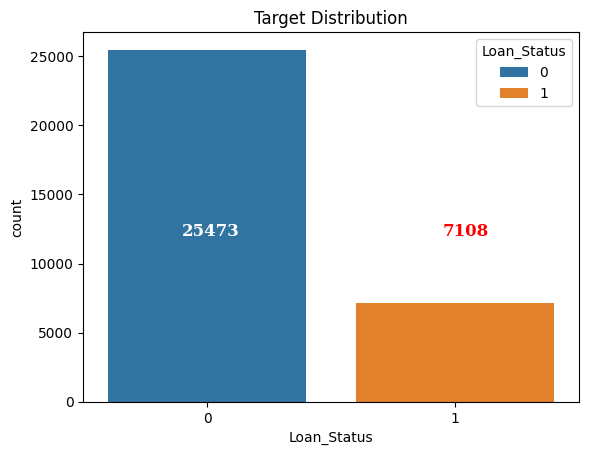

In [7]:
sns.countplot(x=dataset['Loan_Status'], hue=dataset['Loan_Status'])
plt.text(x=0.95,y=12000,s=f'{dataset.Loan_Status.value_counts()[1]}',
         color='red', fontdict={'fontsize': 12, 'fontweight': 'bold', 'family': 'serif'})
plt.text(x=-0.1,y=12000,s=f'{dataset.Loan_Status.value_counts()[0]}',
         color='white', fontdict={'fontsize': 12, 'fontweight': 'bold', 'family': 'serif'})
plt.title('Target Distribution')
plt.show()

<hr><p style="font-family: verdona;">The data is imbalanced but there is substantial amount of data for training each category<hr>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Data Cleaning 

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Handling Duplicates

In [8]:
print('Duplicate records : ', len(dataset[dataset.duplicated()]))
dataset.drop_duplicates(keep='first', inplace=True)
dataset.reset_index(drop=True , inplace=True)
dataset

Duplicate records :  165


Age  Income Home_Ownership  Employment_Length     Loan_Purpose  \
0       22   59000           RENT              123.0         PERSONAL   
1       21    9600            OWN                5.0        EDUCATION   
2       25    9600       MORTGAGE                1.0          MEDICAL   
3       23   65500           RENT                4.0          MEDICAL   
4       24   54400           RENT                8.0          MEDICAL   
...    ...     ...            ...                ...              ...   
32411   57   53000       MORTGAGE                1.0         PERSONAL   
32412   54  120000       MORTGAGE                4.0         PERSONAL   
32413   65   76000           RENT                3.0  HOMEIMPROVEMENT   
32414   56  150000       MORTGAGE                5.0         PERSONAL   
32415   66   42000           RENT                2.0          MEDICAL   

      Loan_Grade  Loan_Amount  Interest_Rate  Loan_Status  Loan_Income_ratio  \
0              D        35000          16.02            1               0.59   
1              B         1000          11.14            0               0.10   
2              C         5500          12.87            1               0.57   
3              C        35000          15.23            1               0.53   
4              C        35000          14.27            1               0.55   
...          ...          ...            ...          ...                ...   
32411          C         5800          13.16            0               0.11   
32412          A        17625           7.49            0               0.15   
32413          B        35000          10.99            1               0.46   
32414          B        15000          11.48            0               0.10   
32415          B         6475           9.99            0               0.15   

      Default_in_History  Credit_History_Length  
0                      Y                      3  
1                      N                      2  
2                      N                      3  
3                      N                      2  
4                      Y                      4  
...                  ...                    ...  
32411                  N                     30  
32412                  N                     19  
32413                  N                     28  
32414                  N                     26  
32415                  N                     30  

[32416 rows x 12 columns]

In [9]:
dataset.Loan_Status.value_counts()

Loan_Status
0    25327
1     7089
Name: count, dtype: int64

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Handling Constant Columns

In [10]:
for i in dataset:
    if len(dataset[i].unique())==1:
        print(i)

<hr><p style="font-family: verdona;"> NO CONSTANT COLS<hr>

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Handling Missing values

In [11]:
dataset.isna().sum()

Age                         0
Income                      0
Home_Ownership              0
Employment_Length         887
Loan_Purpose                0
Loan_Grade                  0
Loan_Amount                 0
Interest_Rate            3095
Loan_Status                 0
Loan_Income_ratio           0
Default_in_History          0
Credit_History_Length       0
dtype: int64

In [12]:
null_data = dataset[dataset.isna().any(axis=1)]
null_data.Loan_Status.value_counts()

Loan_Status
0    3014
1     901
Name: count, dtype: int64

<hr><p style="font-family: verdona;">
The missing data cannot be dropped as it contains 1k records of the minority class which when dropping would lead to
substantial information loss<hr>

<hr><p style="font-family: verdona;"><b>
Techniques to Handle Missing Data : </b><br>
1. Imputing by mean/median/mode<br>
2. For Categoric Variables-<br>
    &emsp;•  If we observe that certain categories consistently correspond to specific ranges of Interest_Rate or Employment_Length, we can impute missing values by randomly selecting a value from the appropriate range for that category. This approach preserves the underlying patterns in the data better than using a single central tendency measure.<br><br>
   For Continous Variables-<br>
    &emsp;•  We can examine how their values correlate with Interest_Rate or Employment_Length. If we find that certain ranges of continuous variables are associated with specific ranges of Interest_Rate or Employment_Length, we can impute missing values by randomly sampling from these corresponding ranges. This method maintains the natural relationships in the data better than using mean or median imputation.
<br> <hr>

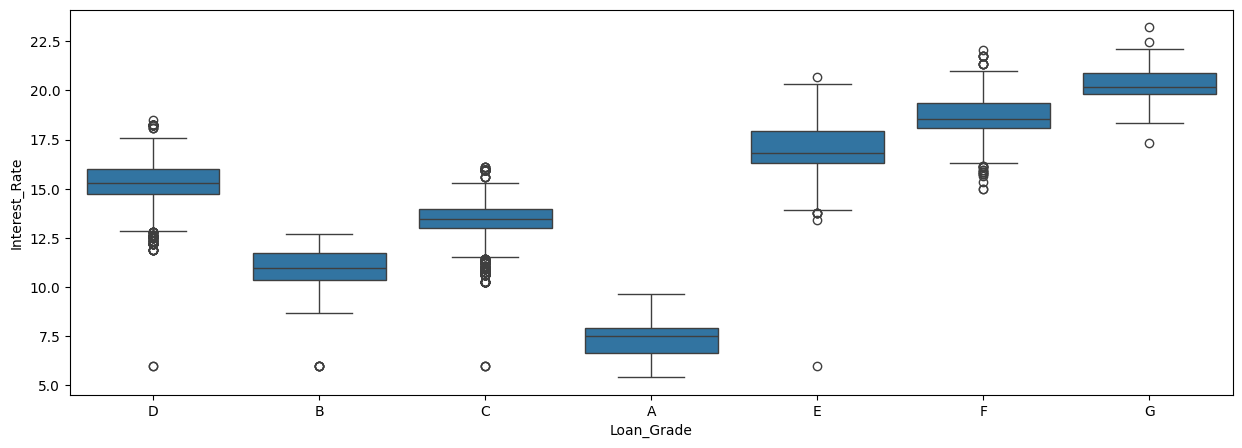

In [13]:
# for i in dataset.select_dtypes(include=object).columns:
#     sns.boxplot(y=dataset['Interest_Rate'], x=dataset[i])
#     plt.show()

# After analyzing all the plots, the most significant bifurcation was observed in the Loan_Grade feature.
plt.figure(figsize=(15,5))
sns.boxplot(y=dataset['Interest_Rate'], x=dataset['Loan_Grade'])
plt.show()

<hr><p style="font-family: verdona;">
Each 'Loan_Grade' category corresponds to a specific 'Interest_Rate' range, also there are 32k records which is a huge number, thus it cannot be said that 'By imputing values within observed ranges, we may inadvertently reinforce the belief that the missing values are always valid within those ranges.'<hr>

In [14]:
loan_grade_bounds = {}

for unique in dataset['Loan_Grade'].unique():
    grade_data = dataset['Interest_Rate'][dataset['Loan_Grade'] == unique]
    lb = grade_data.quantile(0.25)
    ub = grade_data.quantile(0.75)
    loan_grade_bounds[unique] = (lb, ub)

# WILL BE REQUIRED FOR FILLING NULL TESTING RECORDS
loan_grade_bounds

{'D': (14.74, 16.0),
 'B': (10.36, 11.71),
 'C': (12.98, 13.99),
 'A': (6.62, 7.9),
 'E': (16.32, 17.93),
 'F': (18.09, 19.38),
 'G': (19.82, 20.88)}

In [15]:
def impute_interest_rate(row):
    if np.isnan(row['Interest_Rate']): 
        grade = row['Loan_Grade']
        if grade in loan_grade_bounds:
            lb, ub = loan_grade_bounds[grade]
            return round(np.random.uniform(lb, ub),2)  
    return row['Interest_Rate'] 

dataset['Interest_Rate'] = dataset.apply(impute_interest_rate, axis=1)

In [16]:
dataset.isna().sum()

Age                        0
Income                     0
Home_Ownership             0
Employment_Length        887
Loan_Purpose               0
Loan_Grade                 0
Loan_Amount                0
Interest_Rate              0
Loan_Status                0
Loan_Income_ratio          0
Default_in_History         0
Credit_History_Length      0
dtype: int64

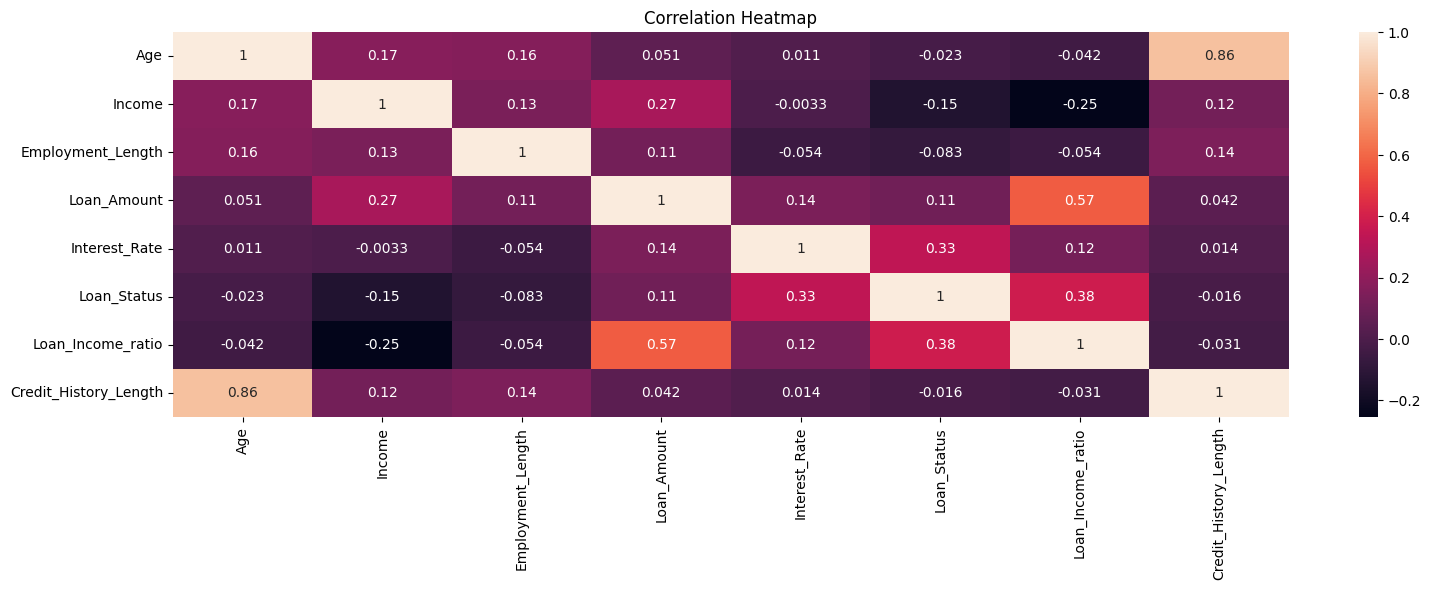

In [17]:
plt.figure(figsize=(18, 5))
plt.title('Correlation Heatmap')
sns.heatmap(dataset.corr(numeric_only=True), annot=True)
plt.show()

<hr><p style="font-family: verdona;">
The scatter plots(based on correlation matrix) and distribution analysis revealed no clear patterns or distinct relationships between variables, to fill out null 'Employment_Length' values<hr>

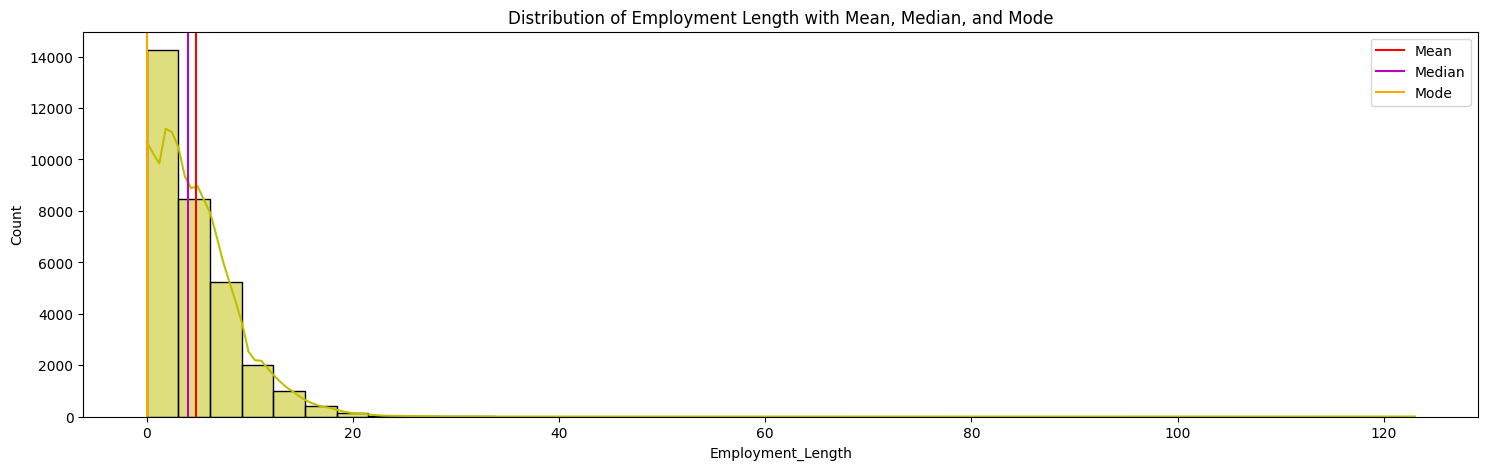

In [18]:
plt.figure(figsize=(18,5))
plt.title("Distribution of Employment Length with Mean, Median, and Mode")
sns.histplot(dataset.Employment_Length, color='y', kde=True, bins=40)
plt.axvline(dataset.Employment_Length.mean(), c='r', linestyle='-', label='Mean')
plt.axvline(dataset.Employment_Length.median(), c='m', linestyle='-', label='Median')
plt.axvline(dataset.Employment_Length.mode()[0], c='orange', linestyle='-', label='Mode')
plt.legend()
plt.show()

<hr><p style="font-family: verdona;">
Filling null values with mode as it benefits the model most while training<hr>

In [19]:
dataset['Employment_Length'] = dataset.Employment_Length.fillna(dataset.Employment_Length.mean())
dataset.isna().sum()

Age                      0
Income                   0
Home_Ownership           0
Employment_Length        0
Loan_Purpose             0
Loan_Grade               0
Loan_Amount              0
Interest_Rate            0
Loan_Status              0
Loan_Income_ratio        0
Default_in_History       0
Credit_History_Length    0
dtype: int64

In [20]:
# WILL BE REQUIRED FOR FILLING NULL TESTING RECORDS
mean_dict = dict(dataset.describe().loc['mean'])

In [21]:
dataset

Age  Income Home_Ownership  Employment_Length     Loan_Purpose  \
0       22   59000           RENT              123.0         PERSONAL   
1       21    9600            OWN                5.0        EDUCATION   
2       25    9600       MORTGAGE                1.0          MEDICAL   
3       23   65500           RENT                4.0          MEDICAL   
4       24   54400           RENT                8.0          MEDICAL   
...    ...     ...            ...                ...              ...   
32411   57   53000       MORTGAGE                1.0         PERSONAL   
32412   54  120000       MORTGAGE                4.0         PERSONAL   
32413   65   76000           RENT                3.0  HOMEIMPROVEMENT   
32414   56  150000       MORTGAGE                5.0         PERSONAL   
32415   66   42000           RENT                2.0          MEDICAL   

      Loan_Grade  Loan_Amount  Interest_Rate  Loan_Status  Loan_Income_ratio  \
0              D        35000          16.02            1               0.59   
1              B         1000          11.14            0               0.10   
2              C         5500          12.87            1               0.57   
3              C        35000          15.23            1               0.53   
4              C        35000          14.27            1               0.55   
...          ...          ...            ...          ...                ...   
32411          C         5800          13.16            0               0.11   
32412          A        17625           7.49            0               0.15   
32413          B        35000          10.99            1               0.46   
32414          B        15000          11.48            0               0.10   
32415          B         6475           9.99            0               0.15   

      Default_in_History  Credit_History_Length  
0                      Y                      3  
1                      N                      2  
2                      N                      3  
3                      N                      2  
4                      Y                      4  
...                  ...                    ...  
32411                  N                     30  
32412                  N                     19  
32413                  N                     28  
32414                  N                     26  
32415                  N                     30  

[32416 rows x 12 columns]

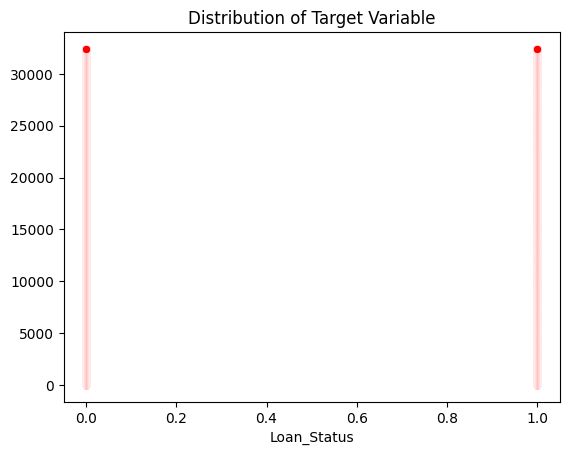

In [22]:
sns.scatterplot(y=np.array(dataset.index), x=dataset.Loan_Status, color='r')
plt.title('Distribution of Target Variable')
plt.show()

<hr><p style="font-family: verdona;">
Verifying that the target variable values (0 and 1) are not clustered together or imbalanced within the dataset. This ensures a proper distribution for reliable analysis and modeling.<hr>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> EDA

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>EDA Tool 

In [23]:
report = ProfileReport(dataset, explorative=True)
report.to_file('eda_reports/eda_report.html')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

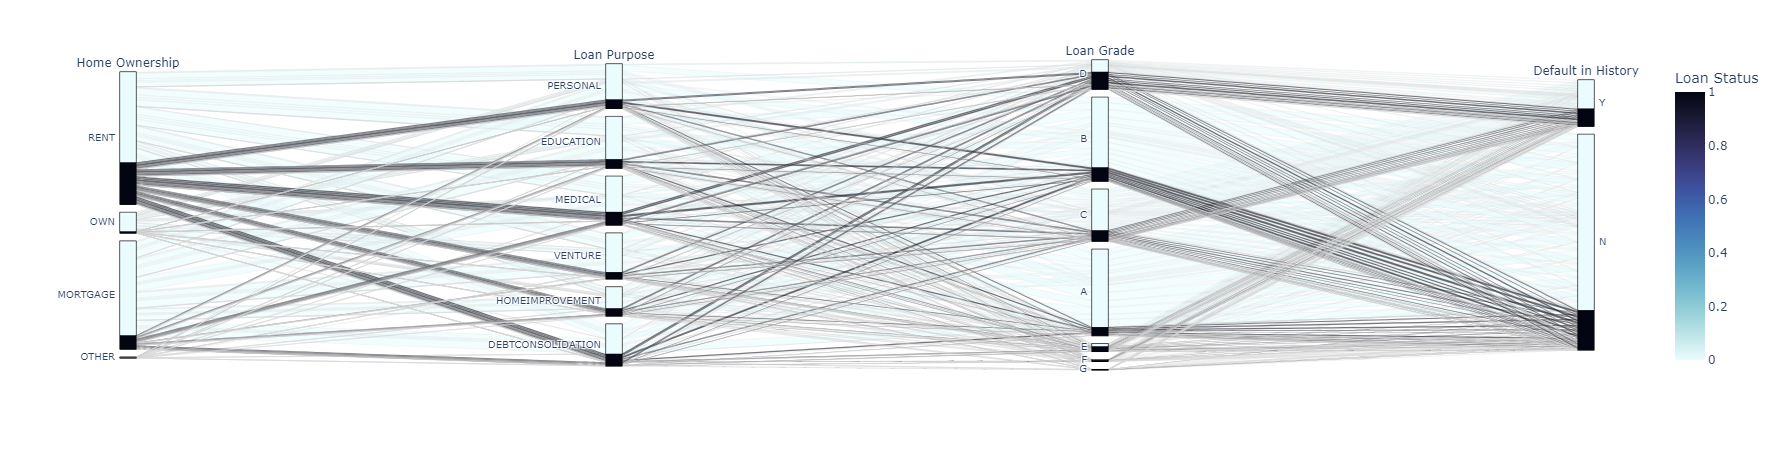

In [24]:
#Parallel category diagram
'''
fig = px.parallel_categories(dataset, color_continuous_scale=px.colors.sequential.ice_r,
        color="Loan_Status",
dimensions=['Home_Ownership', 'Loan_Purpose', "Loan_Grade", 'Default_in_History'], 
        labels={col:col.replace('_', ' ') for col in dataset.columns})
fig.show()
'''

# As plotly graphs are not visible on github(the above code was run during eda but not b4 uploading on Github)
Image(filename='plotly_graphs/parallel_plot.png')

<hr><p style="font-family: verdona;">
<b>Key Observations:</b>
<p style="font-family: verdona;">
    1)Renters defaulted the loan more often than those with a Mortgage, while homeowners defaulted the least.
<p style="font-family: verdona;">
    2)Loans were more often taken for Educational Purpose followed by Medical Expenses and the least for
    HomeImprovement,which seems reasonable as people would rather take loans for necessity then luxury.
    Here the loans taken for Debtconsolidation topped the default list followed by those taken for 
    Medical Expenses.
<p style="font-family: verdona;">
    3)Loan grades are serially assigned where Customer with Grade a being more often getting the Loan
    approved then B,C, and so on. This also justifies the number of loans taken by customers in each Loan Grade.
<p style="font-family: verdona;">
    4)Customers with no default in history, more often get the loan than with default, Customers with defualt in history are more likely to default again than customers with no default. <hr>

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Encoding

<hr><p style="font-family: verdona;">
Listing numeric and categoric features<hr>

In [25]:
numeric_cols = dataset.select_dtypes(include=[int, float]).columns
categoric_cols = dataset.select_dtypes(include=object).columns

<hr><p style="font-family: verdona;">
Ordinal Mapping - As Loan_Grade have order in its values, I will use Label Encoding to Encode those. 
Also as Default_in_History feature is binary variable, thus I will Label Encode it as well.
<p style="font-family: verdona;">
Cardinal Mapping - As Loan_Purpose and Home_Ownership values do not share any relationship I will use
get_dummies function to one hot encode those.<hr>

<div style="background-color: cyan;"><center>
<pre><b><h3><font face=verdona color=red>ONE HOT ENCODING

In [26]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
ohe_data = one_hot_encoder.fit_transform(dataset[['Loan_Purpose', 'Home_Ownership']])
ohe_data = pd.DataFrame(ohe_data, columns=one_hot_encoder.get_feature_names_out(['Loan_Purpose', 'Home_Ownership']))
ohe_data = ohe_data.astype(int)
ohe_data.head()

Loan_Purpose_EDUCATION  Loan_Purpose_HOMEIMPROVEMENT  Loan_Purpose_MEDICAL  \
0                       0                             0                     0   
1                       1                             0                     0   
2                       0                             0                     1   
3                       0                             0                     1   
4                       0                             0                     1   

   Loan_Purpose_PERSONAL  Loan_Purpose_VENTURE  Home_Ownership_OTHER  \
0                      1                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   Home_Ownership_OWN  Home_Ownership_RENT  
0                   0                    1  
1                   1                    0  
2                   0                    0  
3                   0                    1  
4                   0                    1

<div style="background-color: cyan;"><center>
<pre><b><h3><font face=verdona color=red>LABEL ENCODING

In [27]:
label_enc = LabelEncoder()
dataset['Loan_Grade']= label_enc.fit_transform(dataset['Loan_Grade'])

#as it sorts and assigns values y=0 and n=1 but I want y=1 and n=0 thus I will use map function
dataset['Default_in_History'] = dataset['Default_in_History'].map({'Y':1, 'N':0})

dataset

Age  Income Home_Ownership  Employment_Length     Loan_Purpose  \
0       22   59000           RENT              123.0         PERSONAL   
1       21    9600            OWN                5.0        EDUCATION   
2       25    9600       MORTGAGE                1.0          MEDICAL   
3       23   65500           RENT                4.0          MEDICAL   
4       24   54400           RENT                8.0          MEDICAL   
...    ...     ...            ...                ...              ...   
32411   57   53000       MORTGAGE                1.0         PERSONAL   
32412   54  120000       MORTGAGE                4.0         PERSONAL   
32413   65   76000           RENT                3.0  HOMEIMPROVEMENT   
32414   56  150000       MORTGAGE                5.0         PERSONAL   
32415   66   42000           RENT                2.0          MEDICAL   

       Loan_Grade  Loan_Amount  Interest_Rate  Loan_Status  Loan_Income_ratio  \
0               3        35000          16.02            1               0.59   
1               1         1000          11.14            0               0.10   
2               2         5500          12.87            1               0.57   
3               2        35000          15.23            1               0.53   
4               2        35000          14.27            1               0.55   
...           ...          ...            ...          ...                ...   
32411           2         5800          13.16            0               0.11   
32412           0        17625           7.49            0               0.15   
32413           1        35000          10.99            1               0.46   
32414           1        15000          11.48            0               0.10   
32415           1         6475           9.99            0               0.15   

       Default_in_History  Credit_History_Length  
0                       1                      3  
1                       0                      2  
2                       0                      3  
3                       0                      2  
4                       1                      4  
...                   ...                    ...  
32411                   0                     30  
32412                   0                     19  
32413                   0                     28  
32414                   0                     26  
32415                   0                     30  

[32416 rows x 12 columns]

<hr><p style="font-family: verdona;">
Merging dataframes<hr>

In [28]:
dataset = pd.merge(left=dataset.drop(['Home_Ownership', 'Loan_Purpose'], axis=1), right=ohe_data, left_index=True, right_index=True)
dataset

Age  Income  Employment_Length  Loan_Grade  Loan_Amount  Interest_Rate  \
0       22   59000              123.0           3        35000          16.02   
1       21    9600                5.0           1         1000          11.14   
2       25    9600                1.0           2         5500          12.87   
3       23   65500                4.0           2        35000          15.23   
4       24   54400                8.0           2        35000          14.27   
...    ...     ...                ...         ...          ...            ...   
32411   57   53000                1.0           2         5800          13.16   
32412   54  120000                4.0           0        17625           7.49   
32413   65   76000                3.0           1        35000          10.99   
32414   56  150000                5.0           1        15000          11.48   
32415   66   42000                2.0           1         6475           9.99   

       Loan_Status  Loan_Income_ratio  Default_in_History  \
0                1               0.59                   1   
1                0               0.10                   0   
2                1               0.57                   0   
3                1               0.53                   0   
4                1               0.55                   1   
...            ...                ...                 ...   
32411            0               0.11                   0   
32412            0               0.15                   0   
32413            1               0.46                   0   
32414            0               0.10                   0   
32415            0               0.15                   0   

       Credit_History_Length  Loan_Purpose_EDUCATION  \
0                          3                       0   
1                          2                       1   
2                          3                       0   
3                          2                       0   
4                          4                       0   
...                      ...                     ...   
32411                     30                       0   
32412                     19                       0   
32413                     28                       0   
32414                     26                       0   
32415                     30                       0   

       Loan_Purpose_HOMEIMPROVEMENT  Loan_Purpose_MEDICAL  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     1   
3                                 0                     1   
4                                 0                     1   
...                             ...                   ...   
32411                             0                     0   
32412                             0                     0   
32413                             1                     0   
32414                             0                     0   
32415                             0                     1   

       Loan_Purpose_PERSONAL  Loan_Purpose_VENTURE  Home_Ownership_OTHER  \
0                          1                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
32411                      1                     0                     0   
32412                      1                     0                     0   
32413                      0                     0                     0   
32414                      1                     0                     0   
32415                      0                     0         

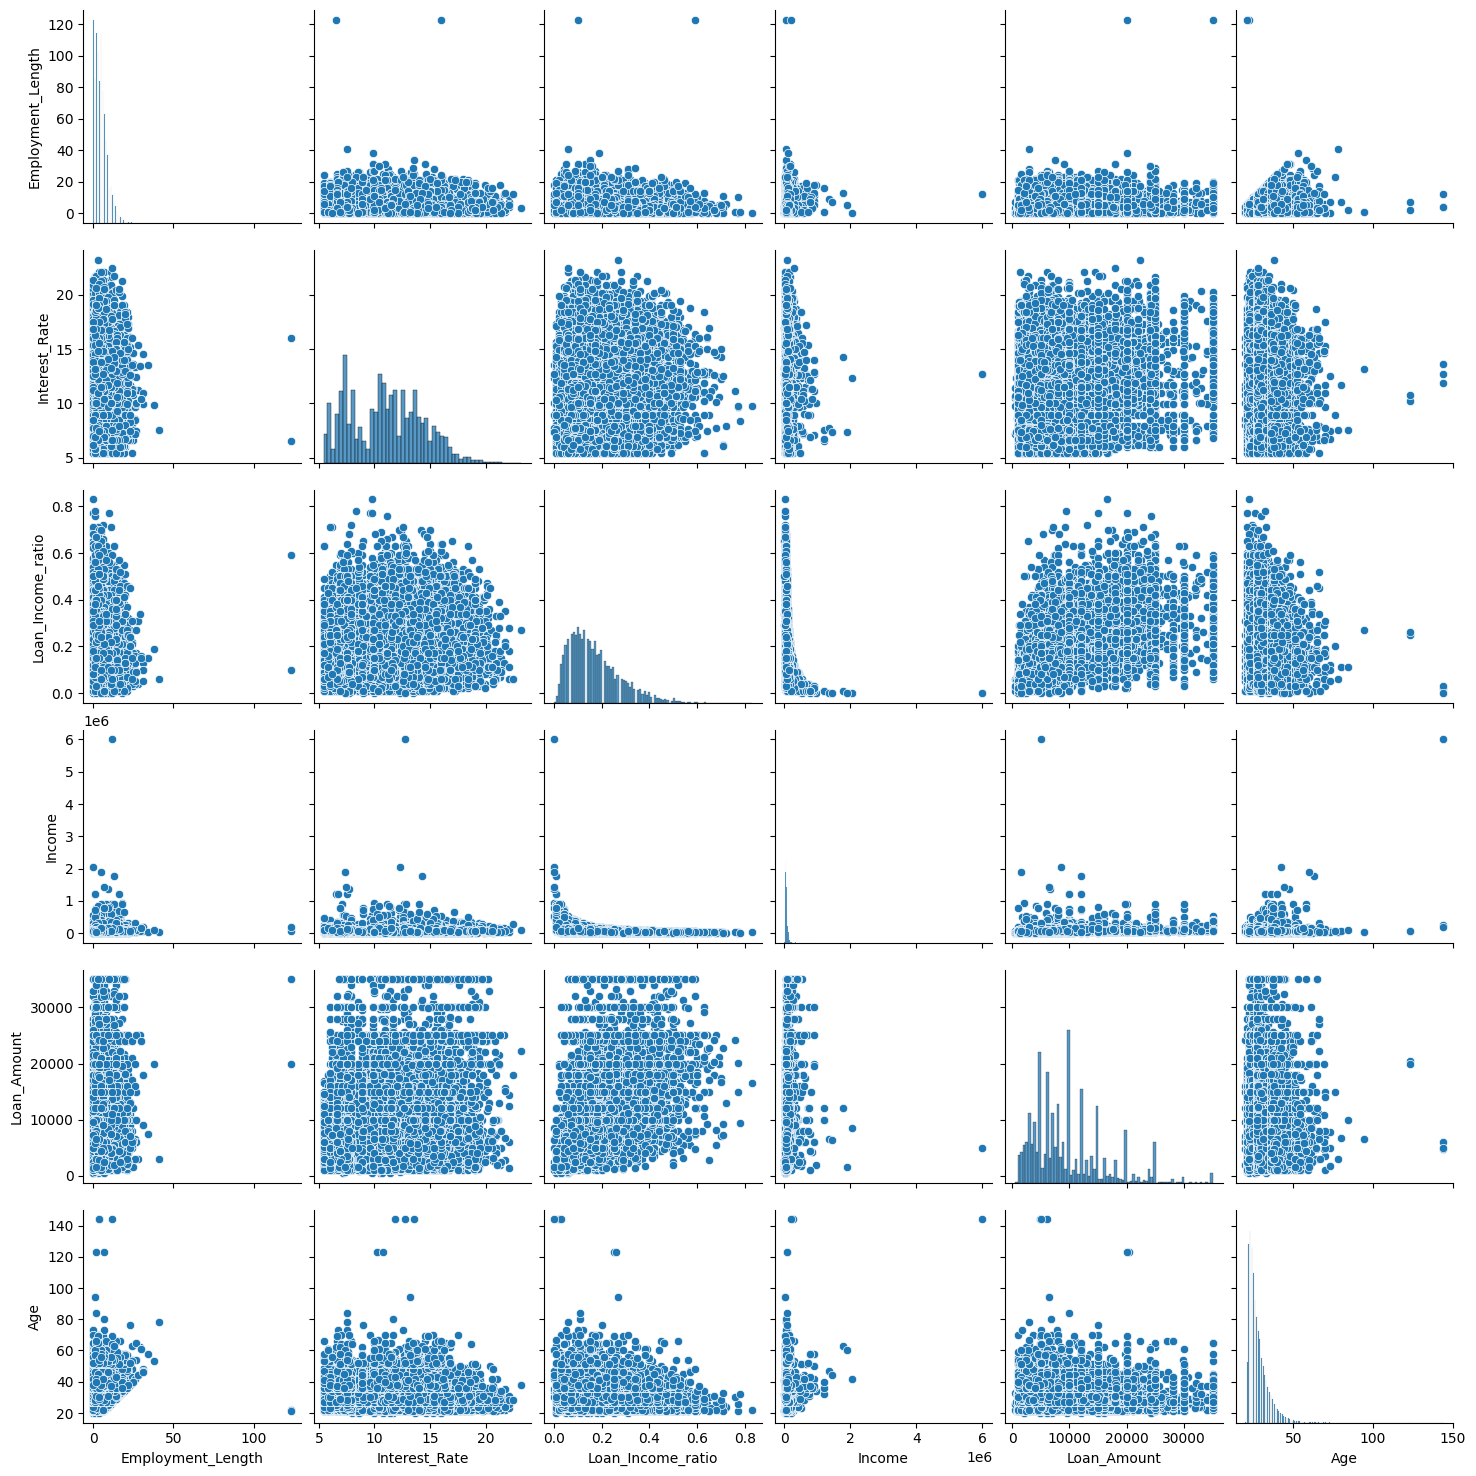

In [29]:
pairplot_dataset = dataset.select_dtypes(include=float)
pairplot_dataset['Income'] = dataset.Income
pairplot_dataset['Loan_Amount'] = dataset.Loan_Amount
pairplot_dataset['Age'] = dataset.Age
sns.pairplot(pairplot_dataset)
plt.show()

<hr><p style="font-family: verdona;">
<b>Observations :</b><br>
    1. There are outliers in every feature which would impact my model.<br>
    2. Some features have high collinearity.<hr>

In [30]:
normally_distributed_cols = []
not_normally_distributed_cols = []

for column in pairplot_dataset.columns:
    _, p_value = stats.normaltest(dataset[column])
    significance_level = 0.5
    if p_value < significance_level:
        not_normally_distributed_cols.append(column)
    else:
        normally_distributed_cols.append(column)

print("Normally Distributed Columns:", normally_distributed_cols)
print("Not Normally Distributed Columns:", not_normally_distributed_cols)

Normally Distributed Columns: []
Not Normally Distributed Columns: ['Employment_Length', 'Interest_Rate', 'Loan_Income_ratio', 'Income', 'Loan_Amount', 'Age']


<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Outlier Handling

<hr><p style="font-family: verdona;">
    - I cannot use Z score Outlier detection as none of the feature is following Guassian(Normal) distribution.<br>
    - Now I will use either percentile method or IQR method for outlier detection whichever suits the best.<hr>

In [31]:
dataset.describe()

Age        Income  Employment_Length    Loan_Grade  \
count  32416.000000  3.241600e+04       32416.000000  32416.000000   
mean      27.747008  6.609164e+04           4.790510      1.220508   
std        6.354100  6.201558e+04           4.088378      1.167293   
min       20.000000  4.000000e+03           0.000000      0.000000   
25%       23.000000  3.854200e+04           2.000000      0.000000   
50%       26.000000  5.500000e+04           4.000000      1.000000   
75%       30.000000  7.921800e+04           7.000000      2.000000   
max      144.000000  6.000000e+06         123.000000      6.000000   

        Loan_Amount  Interest_Rate   Loan_Status  Loan_Income_ratio  \
count  32416.000000   32416.000000  32416.000000       32416.000000   
mean    9593.845632      11.015740      0.218688           0.170250   
std     6322.730241       3.226879      0.413363           0.106812   
min      500.000000       5.420000      0.000000           0.000000   
25%     5000.000000       7.880000      0.000000           0.090000   
50%     8000.000000      10.990000      0.000000           0.150000   
75%    12250.000000      13.470000      0.000000           0.230000   
max    35000.000000      23.220000      1.000000           0.830000   

       Default_in_History  Credit_History_Length  Loan_Purpose_EDUCATION  \
count        32416.000000           32416.000000            32416.000000   
mean             0.176765               5.811297                0.197773   
std              0.381475               4.059030                0.398326   
min              0.000000               2.000000                0.000000   
25%              0.000000               3.000000                0.000000   
50%              0.000000               4.000000                0.000000   
75%              0.000000               8.000000                0.000000   
max              1.000000              30.000000                1.000000   

       Loan_Purpose_HOMEIMPROVEMENT  Loan_Purpose_MEDICAL  \
count                  32416.000000          32416.000000   
mean                       0.110871              0.186389   
std                        0.313977              0.389427   
min                        0.000000              0.000000   
25%                        0.000000              0.000000   
50%                        0.000000              0.000000   
75%                        0.000000              0.000000   
max                        1.000000              1.000000   

       Loan_Purpose_PERSONAL  Loan_Purpose_VENTURE  Home_Ownership_OTHER  \
count           32416.000000          32416.000000          32416.000000   
mean                0.169608              0.175284              0.003270   
std                 0.375293              0.380216              0.057091   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max                 1.000000              1.000000              1.000000   

       Home_Ownership_OWN  Home_Ownership_RENT  
count        32416.000000         32416.000000  
mean             0.079066             0.505244  
std              0.269846             0.499980  
min              0.000000             0.000000  
25%              0.000000             0.000000  
50%              0.000000             1.000000  
75%              0.000000             1.000000  
max              1.000000             1.000000

In [32]:
dataset.Loan_Status.value_counts()

Loan_Status
0    25327
1     7089
Name: count, dtype: int64

In [33]:
def outlier_counter(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    iqr = q3 - q1
    lower_b= q1 - 1.5 * iqr
    upper_b= q3 + 1.5 * iqr    
    outliers = len(data[(data[col] < lower_b) | (data[col] > upper_b)])
    return outliers, lower_b, upper_b

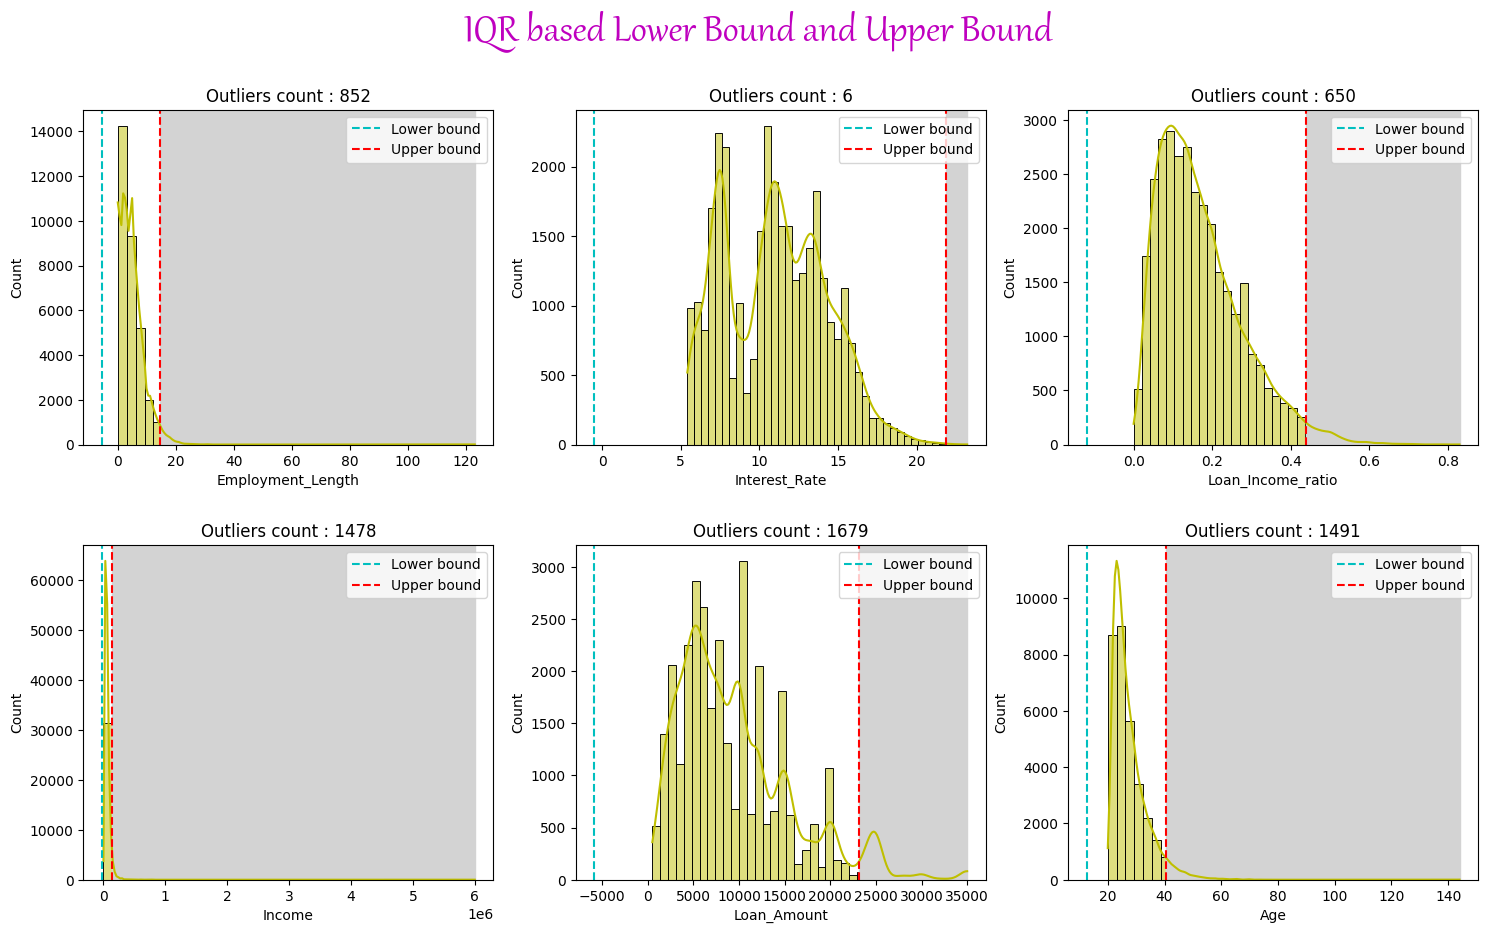

In [34]:
fig, ax = plt.subplots(nrows=round((len(not_normally_distributed_cols)+1)/3), ncols= 3, figsize=(18,10))
axes = ax.flatten()

for index, col in enumerate(not_normally_distributed_cols):
    sns.histplot(dataset[col], ax=axes[index], color='y', kde=True, bins=40)
    outliers_cnt, lb, ub = outlier_counter(dataset, col)
    axes[index].axvline(lb, c='c', linestyle='--', label='Lower bound')
    axes[index].axvline(ub, c='r', linestyle='--', label='Upper bound')
    axes[index].axvspan(xmin=ub, xmax=dataset[col].max(), color='lightgrey')
    axes[index].legend(loc='upper right')
    axes[index].set_title(f'Outliers count : {outliers_cnt}')
fig.suptitle("IQR based Lower Bound and Upper Bound", fontsize=32, font='gabriola', color='m')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [35]:
def perc_outlier_counter(data, col):
    upper_b = np.percentile(data[col], 99)
    lower_b = np.percentile(data[col], 1)
    outliers = len(data[(data[col] < lower_b ) | (data[col] > upper_b)])
    return outliers, lower_b, upper_b

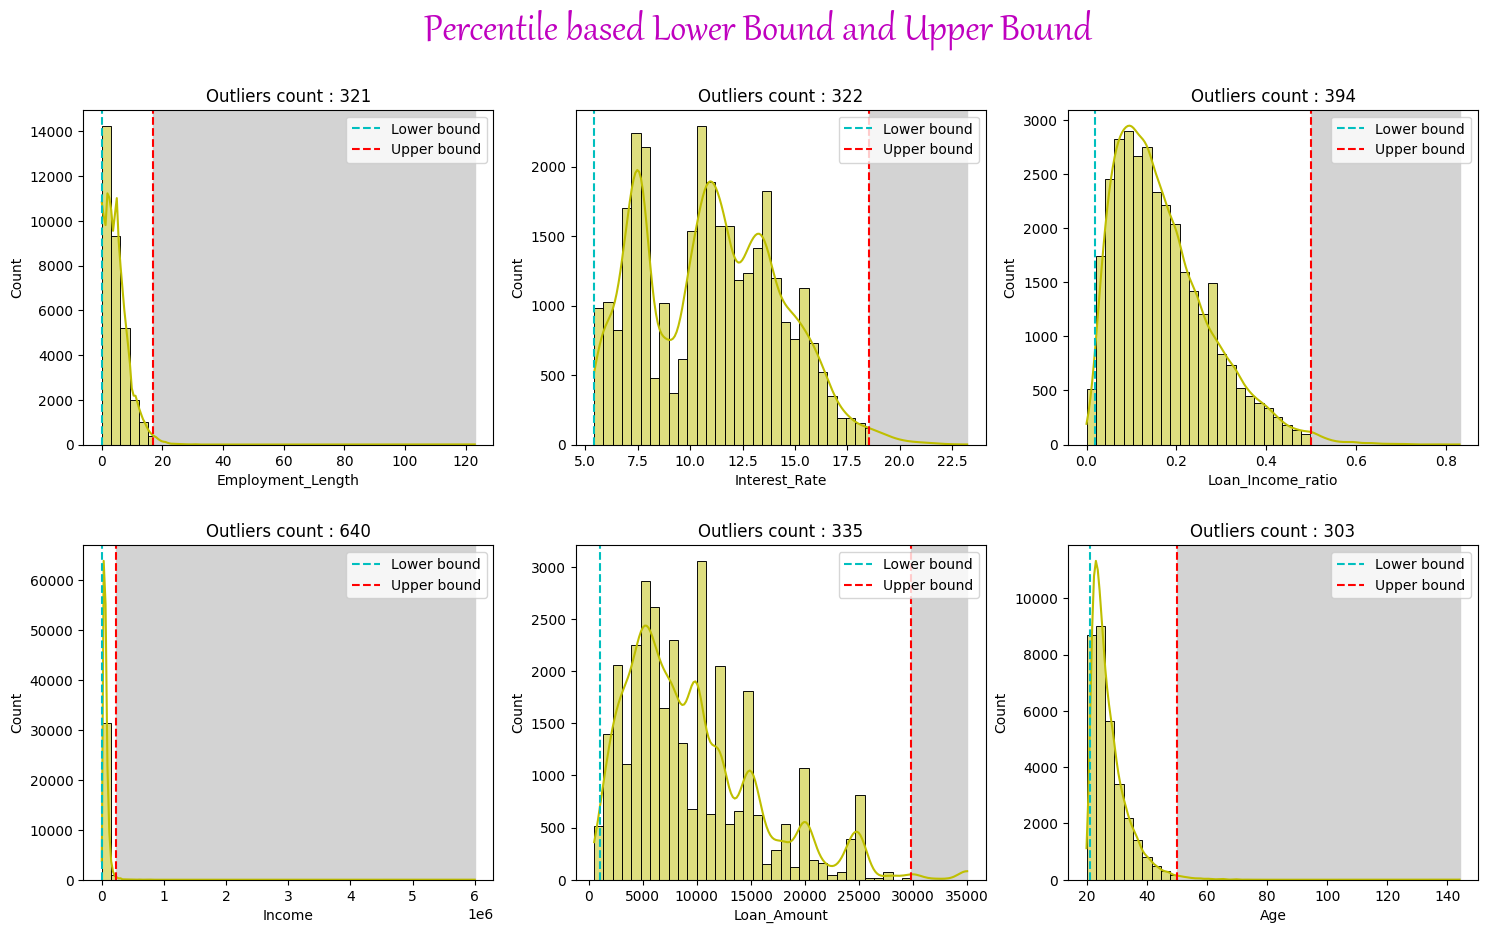

In [36]:
fig, ax = plt.subplots(nrows=round((len(not_normally_distributed_cols)+1)/3), ncols= 3, figsize=(18,10))
axes = ax.flatten()

for index, col in enumerate(not_normally_distributed_cols):
    sns.histplot(dataset[col], ax=axes[index], color='y', kde=True, bins=40)
    outliers_cnt, lb, ub = perc_outlier_counter(dataset, col)
    axes[index].axvline(lb, c='c', linestyle='--', label='Lower bound')
    axes[index].axvline(ub, c='r', linestyle='--', label='Upper bound')
    axes[index].axvspan(xmin=ub, xmax=dataset[col].max(), color='lightgrey')
    axes[index].legend(loc='upper right')
    axes[index].set_title(f'Outliers count : {outliers_cnt}')
fig.suptitle("Percentile based Lower Bound and Upper Bound", fontsize=32, font="gabriola", color='m')
plt.subplots_adjust(hspace=0.3)
plt.show()

<hr><p style="font-family: verdona;">Tested both the Outlier detection methods and got better results from IQR method<hr>

In [37]:
def Outlier_trimmer(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    return data, lower_bound, upper_bound

In [38]:
def Outlier_capper(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data, lower_bound, upper_bound

In [39]:
features_bounds = dict()
for index,col in enumerate(not_normally_distributed_cols):
    ol, lb, ub = outlier_counter(dataset, not_normally_distributed_cols[index])
    if ol < len(dataset)*0.01  :
        print(col, 'Applying Outlier_trimmer as Outlier count = ', ol)
        dataset, lb, ub = Outlier_trimmer(dataset, not_normally_distributed_cols[index])
        features_bounds[col] = (lb,ub)# WILL BE REQUIRED FOR FILLING NULL TESTING RECORDS
        print(dataset.shape)
    elif ol > len(dataset)*0.01:
        print(col, 'Applying Outlier_capper as Outlier count = ', ol)
        dataset, lb, ub = Outlier_capper(dataset, not_normally_distributed_cols[index])
        features_bounds[col] = (lb,ub)# WILL BE REQUIRED FOR FILLING NULL TESTING RECORDS
        print(dataset.shape)
    else:
        print('No outliers ')

Employment_Length Applying Outlier_capper as Outlier count =  852
(32416, 18)
Interest_Rate Applying Outlier_trimmer as Outlier count =  6
(32410, 18)
Loan_Income_ratio Applying Outlier_capper as Outlier count =  650
(32410, 18)
Income Applying Outlier_capper as Outlier count =  1477
(32410, 18)
Loan_Amount Applying Outlier_capper as Outlier count =  1679
(32410, 18)
Age Applying Outlier_capper as Outlier count =  1491
(32410, 18)


C:\Users\7XIN\AppData\Local\Temp\ipykernel_5628\3226747217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
C:\Users\7XIN\AppData\Local\Temp\ipykernel_5628\3226747217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


In [40]:
# WILL BE REQUIRED FOR FILLING NULL TESTING RECORDS
for col in dataset.columns:
    if col not in features_bounds.keys():
        features_bounds[col] = (dataset.describe().loc['min'][col], dataset.describe().loc['max'][col])

In [41]:
dataset.Loan_Status.value_counts()

Loan_Status
0    25326
1     7084
Name: count, dtype: int64

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Handling Multicollinearity

<Axes: >

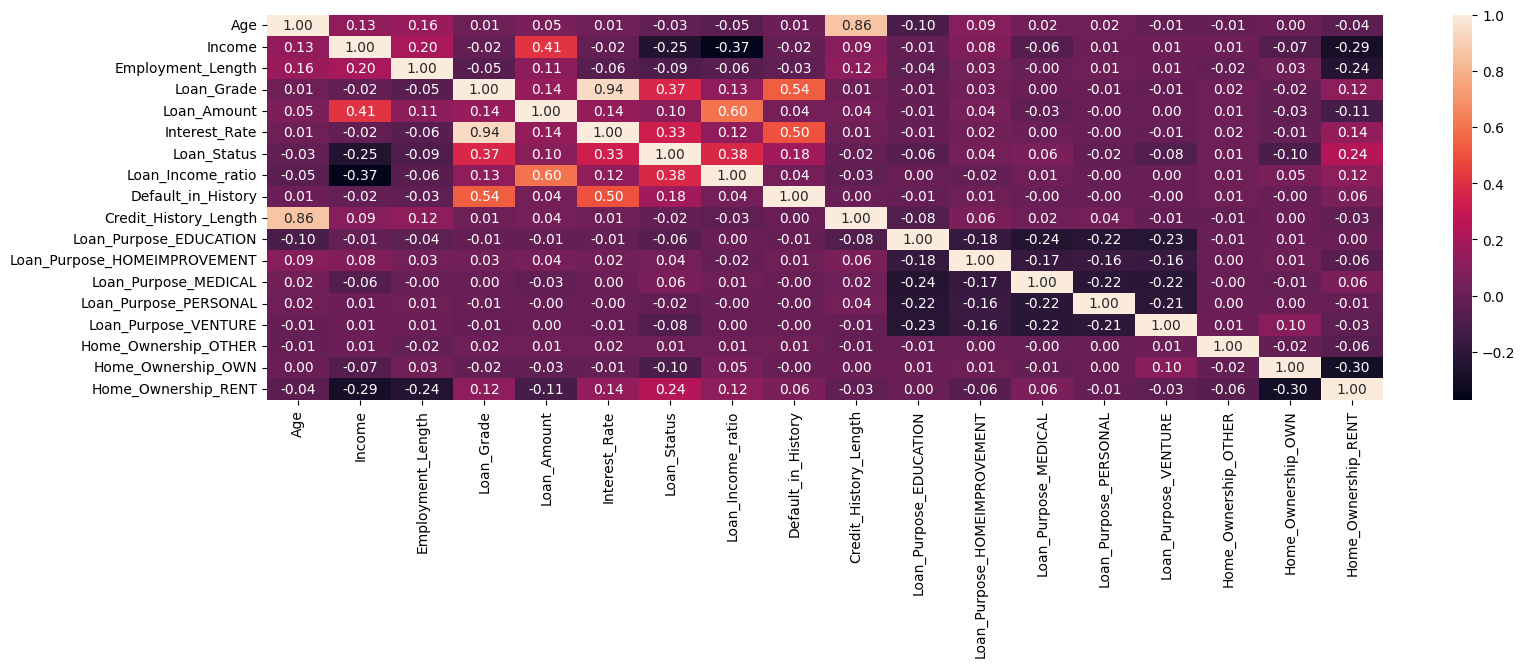

In [42]:
plt.figure(figsize=(18, 5))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

In [43]:
dataset2 = dataset.drop(['Credit_History_Length', 'Interest_Rate'], axis=1)

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Resampling (Ineffective)

<div style="background-color: cyan;"><center>
<pre><b><h3><font face=verdona color=red>Downsampling

In [44]:
dataset_maj = dataset2[dataset2['Loan_Status']==0]
dataset_min = dataset2[dataset2['Loan_Status']==1]

print(dataset_maj.shape)
print(dataset_min.shape)

(25326, 16)
(7084, 16)


In [45]:
dataset_maj = dataset_maj.sample(len(dataset_min)) 

print(dataset_maj.shape)
print(dataset_min.shape)

(7084, 16)
(7084, 16)


In [46]:
balanced_dataset = pd.concat([dataset_maj, dataset_min])
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_dataset.shape)
balanced_dataset

(14168, 16)


Age    Income  Employment_Length  Loan_Grade  Loan_Amount  \
0      24.0   48000.0                7.0           1     5600.000   
1      30.0   43000.0                3.0           0    15000.000   
2      29.0   61656.0                4.0           0    15000.000   
3      24.0  105000.0                4.0           2     4000.000   
4      23.0   14000.0                2.0           3     4000.000   
...     ...       ...                ...         ...          ...   
14163  21.0   36000.0                2.0           1     6000.000   
14164  27.0   32220.0               11.0           1    17725.000   
14165  29.0   88000.0                6.0           2    12000.000   
14166  32.0   65000.0               14.5           0     5500.000   
14167  22.0  140161.5                5.0           3    23109.375   

       Loan_Status  Loan_Income_ratio  Default_in_History  \
0                0               0.12                   0   
1                1               0.35                   0   
2                0               0.24                   0   
3                0               0.04                   0   
4                1               0.29                   0   
...            ...                ...                 ...   
14163            0               0.17                   0   
14164            1               0.44                   0   
14165            0               0.14                   0   
14166            0               0.08                   0   
14167            1               0.16                   1   

       Loan_Purpose_EDUCATION  Loan_Purpose_HOMEIMPROVEMENT  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   
...                       ...                           ...   
14163                       1                             0   
14164                       0                             0   
14165                       1                             0   
14166                       0                             0   
14167                       0                             0   

       Loan_Purpose_MEDICAL  Loan_Purpose_PERSONAL  Loan_Purpose_VENTURE  \
0                         0                      1                     0   
1                         0                      0                     1   
2                         0                      0                     1   
3                         0                      0                     1   
4                         0                      0                     0   
...                     ...                    ...                   ...   
14163                     0                      0                     0   
14164                     1                      0                     0   
14165                     0                      0                     0   
14166                     0                      0                     0   
14167                     0                      0                     0   

       Home_Ownership_OTHER  Home_Ownership_OWN  Home_Ownership_RENT  
0                         0                   0                    1  
1                         0                   0                    1  
2                         0                   0                    1  
3                         0                   0                    0  
4                         0                   1                    0  
...                     ...                 ...                  ...  
14163                     0                   0                    1  
14164                     0                   0                    1  
14165                     0                   0                    1  
14166                     0                   0                   

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Model Building and Training

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Seperating independent and dependent variables

In [47]:
print(dataset2.shape)
dataset2.head()

(32410, 16)


Age   Income  Employment_Length  Loan_Grade  Loan_Amount  Loan_Status  \
0  22.0  59000.0               14.5           3    23109.375            1   
1  21.0   9600.0                5.0           1     1000.000            0   
2  25.0   9600.0                1.0           2     5500.000            1   
3  23.0  65500.0                4.0           2    23109.375            1   
4  24.0  54400.0                8.0           2    23109.375            1   

   Loan_Income_ratio  Default_in_History  Loan_Purpose_EDUCATION  \
0               0.44                   1                       0   
1               0.10                   0                       1   
2               0.44                   0                       0   
3               0.44                   0                       0   
4               0.44                   1                       0   

   Loan_Purpose_HOMEIMPROVEMENT  Loan_Purpose_MEDICAL  Loan_Purpose_PERSONAL  \
0                             0                     0                      1   
1                             0                     0                      0   
2                             0                     1                      0   
3                             0                     1                      0   
4                             0                     1                      0   

   Loan_Purpose_VENTURE  Home_Ownership_OTHER  Home_Ownership_OWN  \
0                     0                     0                   0   
1                     0                     0                   1   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Home_Ownership_RENT  
0                    1  
1                    0  
2                    0  
3                    1  
4                    1

In [48]:
X = dataset2.drop(['Loan_Status'], axis=1).values
y = dataset2['Loan_Status'].values

In [49]:
print(X.shape, y.shape)

(32410, 15) (32410,)


<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Scaling, Dimensionality Reduction, Splitting Data, <br>Cross Validation, Model Building and Training, Evaluation

In [50]:
scaler = StandardScaler() #MinMaxScaler((0,1))
pca = PCA(n_components=10)

gb = GradientBoostingClassifier()
rforest = RandomForestClassifier(class_weight='balanced') 
l_reg = LogisticRegression(class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=3)
xgbrf = XGBRFClassifier(scale_pos_weight=5)
dtree = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=15)
knc = KNeighborsClassifier(weights='uniform')
gnb = GaussianNB()
lgb_model = LGBMClassifier(class_weight='balanced', verbose=-1)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = [xgb, lgb_model, gb, rforest, xgbrf, dtree, knc, l_reg, gnb]
model_names = ['XGBoost', 'LightGBM', 'Gradient Boosting', 'RForest', 'XGBRF', 'DTree', 'KNNeighbors', 
               'Logistic Regression', 'GNB']

best_models = {}
models_mean_scores = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_recall = 0.0

    print(f'\n\t\t\t\t{model_name}')
    results = []
    start = time.time()

    for train_indices, test_indices in kfold.split(X):            
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices],y[test_indices]
        X_train = scaler.fit_transform(X_train)
        # X_train = pca.fit_transform(X_train)
        
        model.fit(X_train, y_train)

        X_test = scaler.transform(X_test)
        # X_test = pca.transform(X_test)
        y_pred = model.predict_proba(X_test)[:, 1]

        y_pred_cm = np.where(y_pred > 0.5, 1, 0)
        roc_auc_s = roc_auc_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cm).ravel()
        specificity = round(tn / (tn + fp), 2)

        recall = recall_score(y_test, y_pred_cm)
        time_elapsed = time.time() - start

        results.append({
            'Specificity (TNR)' : specificity, # True Negative Rate 
            'Recall (TPR)' : round(recall, 3),
            'ROC_AUC_SCORE': round(roc_auc_s, 3),
            'Time Taken (s)': round(time_elapsed, 2)
        })

        if recall > best_recall:
            best_accuracy = recall
            best_models[model_name] = {
                'Scaler': scaler,
                'Model': model
            }

    models_mean_scores[model_name] = {
        'Recall (TPR)' : np.mean([r['Recall (TPR)'] for r in results]),
        'Specificity (TNR)' : np.mean([r['Specificity (TNR)'] for r in results]),
        }

    results_df = pd.DataFrame(results)

    print(results_df.to_string(index=False))
    print("-" * 80)
    print(f'Mean:\t     {round(results_df['Specificity (TNR)'].mean(),
                                3)}\t   {round(results_df['Recall (TPR)'].mean(), 
                                3)}\t  {round(results_df["ROC_AUC_SCORE"].mean(), 
                                3)}\t\t   {round(results_df['Time Taken (s)'].mean(), 2)}')


				XGBoost
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.96         0.804          0.956            0.60
              0.96         0.803          0.945            0.78
              0.96         0.789          0.949            0.95
              0.96         0.779          0.942            1.14
              0.96         0.795          0.950            1.61
--------------------------------------------------------------------------------
Mean:	     0.96	   0.794	  0.948		   1.02

				LightGBM
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.95         0.808          0.953            0.59
              0.95         0.805          0.945            0.80
              0.95         0.801          0.951            1.02
              0.96         0.779          0.945            1.22
              0.95         0.804          0.952            1.63
--------------------------------------------------------------------------------
M

In [51]:
eval_df = pd.DataFrame(models_mean_scores).T 
sorted_eval_df = eval_df.sort_values(by='Specificity (TNR)')
sorted_eval_df

Recall (TPR)  Specificity (TNR)
Logistic Regression        0.7838              0.792
GNB                        0.6588              0.870
DTree                      0.8132              0.876
XGBRF                      0.7722              0.922
LightGBM                   0.7994              0.952
XGBoost                    0.7940              0.960
KNNeighbors                0.6118              0.976
Gradient Boosting          0.7098              0.986
RForest                    0.7200              0.990

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Visualizing Evaluation Metrics

<Figure size 1000x600 with 0 Axes>

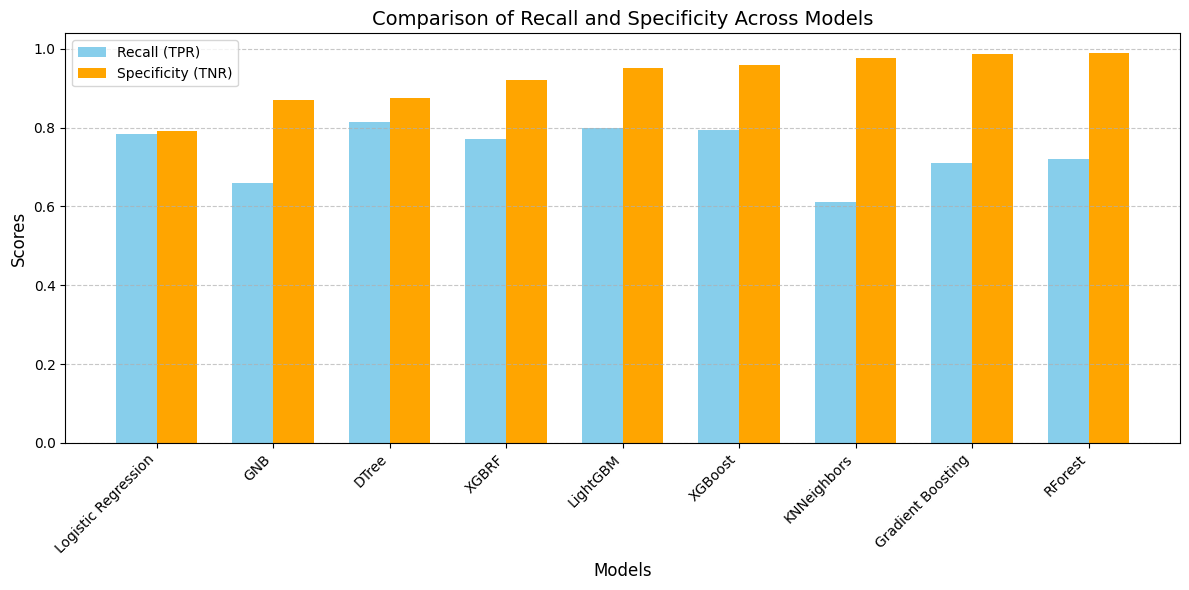

In [52]:
plt.figure(figsize=(10, 6)) 
models = sorted_eval_df.index.tolist()
recall = sorted_eval_df['Recall (TPR)'].tolist()
specificity = sorted_eval_df['Specificity (TNR)'].tolist()

bar_width = 0.35
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, recall, bar_width, label='Recall (TPR)', color='skyblue')
ax.bar(x + bar_width/2, specificity, bar_width, label='Specificity (TNR)', color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Recall and Specificity Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="background-color: yellow;"><center>
<pre><b><h3><font face=verdona color=green>Ideal Metrics

<hr><p style="font-family: verdona;">
In a task like Credit Risk assesment identifying borrowers who are likely to default (True Positives) is crucial. 
Failing to identify these borrowers can lead to significant financial losses for the lending institution. Therefore, 
ensuring that the model has a good recall (true positive rate) is important.While minimizing False Negatives is crucial,
it's also important to control False Positives. 
<p style="font-family: verdona;">
False Positives occur when the model predicts that a borrower will default, but they do not. While this doesn't
lead to immediate financial losses, it can result in missed business opportunities and customer dissatisfaction.
Unnecessarily declining loans to creditworthy customers can lead to revenue loss and potential customer churn<hr>

<div style="background-color: yellow;"><center>
<b><h3><font face=verdona color=green>Hyperparam Tuning Best Models <br>(XGBoost, DecisionTree, LightGBM)

In [53]:
lgb_model = LGBMClassifier(
    num_leaves=60,
    alpha=0.1,
    verbose=-1,
    random_state=42,
    class_weight='balanced'
)

xgb = XGBClassifier(
    n_estimators=350,
    learning_rate=0.3,
    max_depth=3,
    alpha=0.1,
    random_state=42,
    scale_pos_weight=3
)

dtree = DecisionTreeClassifier(
    criterion='log_loss',
    min_samples_leaf=15,
    random_state=64,
    class_weight='balanced'
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = [dtree, lgb_model, xgb]
model_names = ['DTree', 'LightGBM', 'XGBoost']
best_models = {}
models_mean_scores = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_recall = 0.0

    print(f'\n\t\t\t\t{model_name}')
    results = []
    start = time.time()

    for train_indices, test_indices in kfold.split(X):            
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices],y[test_indices]
        X_train = scaler.fit_transform(X_train)
        # X_train = pca.fit_transform(X_train)
        
        model.fit(X_train, y_train)

        X_test = scaler.transform(X_test)
        # X_test = pca.transform(X_test)
        y_pred = model.predict_proba(X_test)[:, 1]

        y_pred_cm = np.where(y_pred > 0.5, 1, 0)
        roc_auc_s = roc_auc_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cm).ravel()
        specificity = round(tn / (tn + fp), 2)

        recall = recall_score(y_test, y_pred_cm)
        time_elapsed = time.time() - start

        results.append({
            'Specificity (TNR)' : specificity, # True Negative Rate 
            'Recall (TPR)' : round(recall, 3),
            'ROC_AUC_SCORE': round(roc_auc_s, 3),
            'Time Taken (s)': round(time_elapsed, 2)
        })

        if recall > best_recall:
            best_accuracy = recall
            best_models[model_name] = {
                'Scaler': scaler,
                'Model': model
            }

    models_mean_scores[model_name] = {
        'Recall (TPR)' : np.mean([r['Recall (TPR)'] for r in results]),
        'Specificity (TNR)' : np.mean([r['Specificity (TNR)'] for r in results]),
        }

    results_df = pd.DataFrame(results)

    print(results_df.to_string(index=False))
    print("-" * 80)
    print(f'Mean:\t     {round(results_df['Specificity (TNR)'].mean(),
                                3)}\t   {round(results_df['Recall (TPR)'].mean(), 
                                3)}\t  {round(results_df["ROC_AUC_SCORE"].mean(), 
                                3)}\t\t   {round(results_df['Time Taken (s)'].mean(), 2)}')


				DTree
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.88         0.814          0.916            0.13
              0.87         0.807          0.907            0.23
              0.88         0.806          0.903            0.35
              0.87         0.797          0.898            0.46
              0.87         0.826          0.917            0.57
--------------------------------------------------------------------------------
Mean:	     0.874	   0.81	  0.908		   0.35

				LightGBM
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.95         0.814          0.955            0.28
              0.95         0.807          0.946            0.56
              0.95         0.796          0.950            0.82
              0.96         0.780          0.945            1.09
              0.96         0.804          0.952            1.75
--------------------------------------------------------------------------------
Mea

In [54]:
eval_df = pd.DataFrame(models_mean_scores).T 
sorted_eval_df = eval_df.sort_values(by='Specificity (TNR)')
sorted_eval_df

Recall (TPR)  Specificity (TNR)
DTree           0.8100              0.874
XGBoost         0.8044              0.950
LightGBM        0.8002              0.954

<Figure size 1000x600 with 0 Axes>

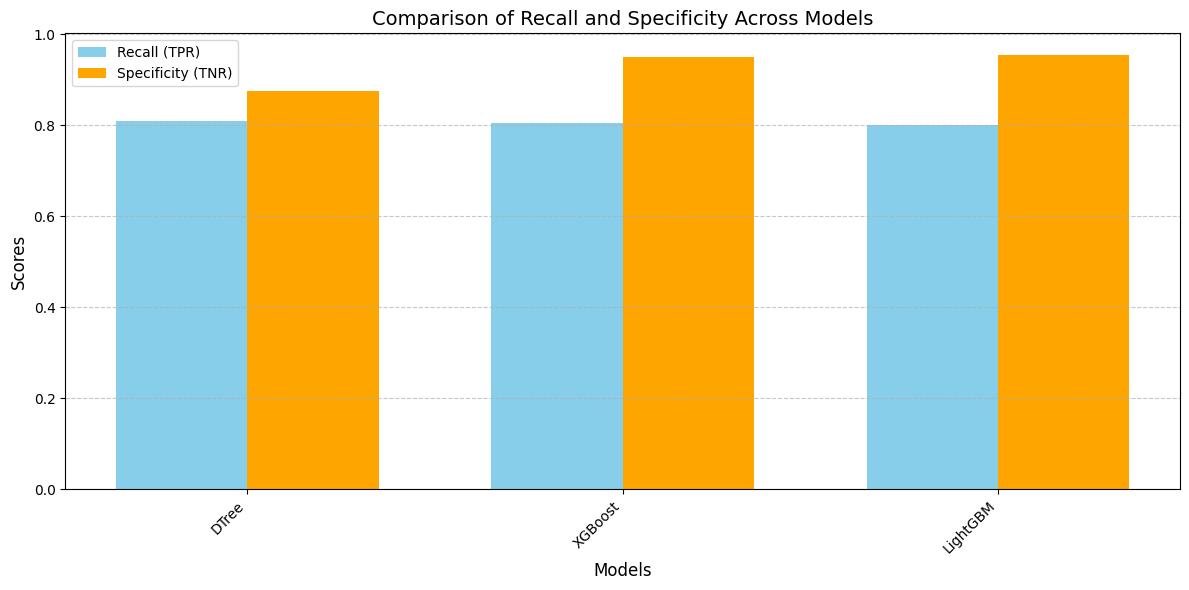

In [55]:
plt.figure(figsize=(10, 6)) 
models = sorted_eval_df.index.tolist()
recall = sorted_eval_df['Recall (TPR)'].tolist()
specificity = sorted_eval_df['Specificity (TNR)'].tolist()

bar_width = 0.35
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, recall, bar_width, label='Recall (TPR)', color='skyblue')
ax.bar(x + bar_width/2, specificity, bar_width, label='Specificity (TNR)', color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Recall and Specificity Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="background-color: yellow;"><center>
<b><h3><font face=verdona color=green>Voting and Stacking Classifier on Best Models

<hr><p style="font-family: verdona;">We can implement Stacking and Voting Classifiers, incorporating the XGBoost and LightGBM models. Although the Gradient Boosting model demonstrates high accuracy, it will be excluded due to its significant time consumption.<hr>

In [56]:
lgb_model = LGBMClassifier(
    num_leaves=60,
    alpha=0.1,
    force_row_wise=True,
    verbose=-1,
    random_state=42, 
    class_weight='balanced'
)

xgb = XGBClassifier(
    n_estimators=350,
    learning_rate=0.3,
    max_depth=3,
    alpha=0.1,
    random_state=42,
    scale_pos_weight=3
)

l_reg = LogisticRegression(class_weight='balanced')

vt = VotingClassifier(estimators=[('XGBoost', xgb), ('LightBGM', lgb_model)], voting='soft')
st = StackingClassifier(estimators=[('XGBoost', xgb), ('LightBGM', lgb_model)],
                        final_estimator=l_reg)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = [vt, st]
model_names = ['VT_Clf', 'ST_Clf']
best_models = {}
models_mean_scores = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_recall = 0.0

    print(f'\n\t\t\t\t{model_name}')
    results = []
    start = time.time()

    for train_indices, test_indices in kfold.split(X):            
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices],y[test_indices]
        X_train = scaler.fit_transform(X_train)
        # X_train = pca.fit_transform(X_train)
        
        model.fit(X_train, y_train)

        X_test = scaler.transform(X_test)
        # X_test = pca.transform(X_test)
        y_pred = model.predict_proba(X_test)[:, 1]

        y_pred_cm = np.where(y_pred > 0.5, 1, 0)
        roc_auc_s = roc_auc_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cm).ravel()
        specificity = round(tn / (tn + fp), 2)

        recall = recall_score(y_test, y_pred_cm)
        time_elapsed = time.time() - start

        results.append({
            'Specificity (TNR)' : specificity, # True Negative Rate 
            'Recall (TPR)' : round(recall, 3),
            'ROC_AUC_SCORE': round(roc_auc_s, 3),
            'Time Taken (s)': round(time_elapsed, 2)
        })

        if recall > best_recall:
            best_accuracy = recall
            best_models[model_name] = {
                'Scaler': scaler,
                'Model': model
            }

    models_mean_scores[model_name] = {
        'Recall (TPR)' : np.mean([r['Recall (TPR)'] for r in results]),
        'Specificity (TNR)' : np.mean([r['Specificity (TNR)'] for r in results]),
        }

    results_df = pd.DataFrame(results)

    print(results_df.to_string(index=False))
    print("-" * 80)
    print(f'Mean:\t     {round(results_df['Specificity (TNR)'].mean(),
                                3)}\t   {round(results_df['Recall (TPR)'].mean(), 
                                3)}\t  {round(results_df["ROC_AUC_SCORE"].mean(), 
                                3)}\t\t   {round(results_df['Time Taken (s)'].mean(), 2)}')


				VT_Clf
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.96         0.811          0.958            0.57
              0.95         0.809          0.949            1.15
              0.96         0.806          0.953            1.97
              0.96         0.779          0.949            2.52
              0.96         0.802          0.955            3.10
--------------------------------------------------------------------------------
Mean:	     0.958	   0.801	  0.953		   1.86

				ST_Clf
 Specificity (TNR)  Recall (TPR)  ROC_AUC_SCORE  Time Taken (s)
              0.93         0.842          0.958            3.58
              0.93         0.832          0.949            8.20
              0.93         0.827          0.953           11.58
              0.93         0.816          0.949           14.60
              0.94         0.832          0.955           17.80
--------------------------------------------------------------------------------
Mea

In [57]:
eval_df = pd.DataFrame(models_mean_scores).T 
sorted_eval_df = eval_df.sort_values(by='Specificity (TNR)')
sorted_eval_df

Recall (TPR)  Specificity (TNR)
ST_Clf        0.8298              0.932
VT_Clf        0.8014              0.958

<Figure size 1000x600 with 0 Axes>

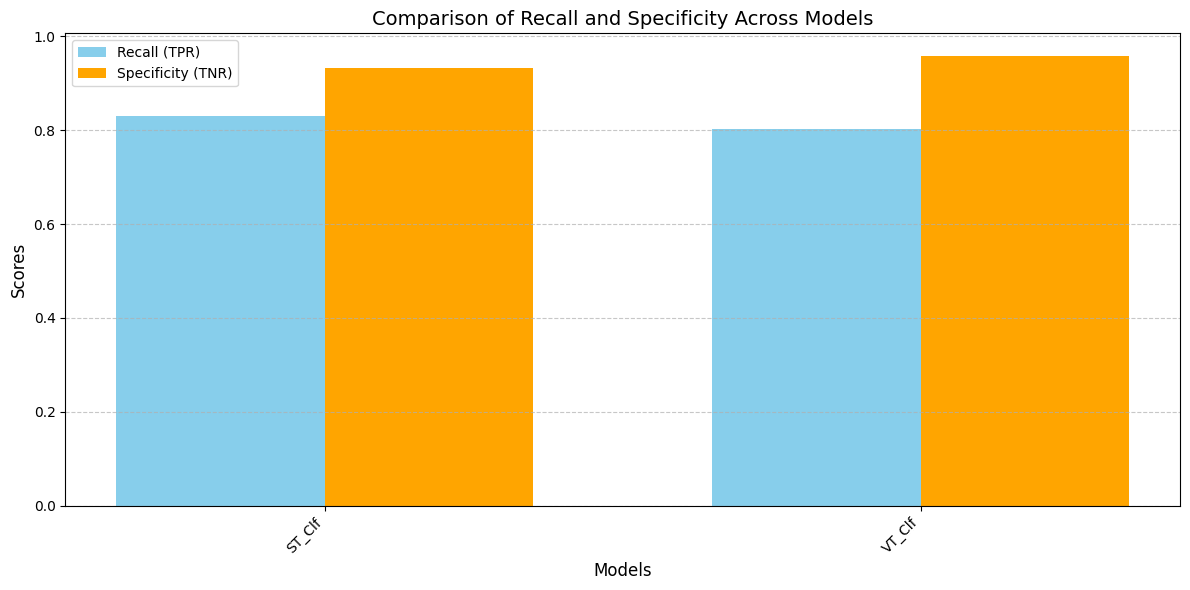

In [58]:
plt.figure(figsize=(10, 6)) 
models = sorted_eval_df.index.tolist()
recall = sorted_eval_df['Recall (TPR)'].tolist()
specificity = sorted_eval_df['Specificity (TNR)'].tolist()

bar_width = 0.35
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, recall, bar_width, label='Recall (TPR)', color='skyblue')
ax.bar(x + bar_width/2, specificity, bar_width, label='Specificity (TNR)', color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Recall and Specificity Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<hr><p style="font-family: verdona;">Both the models perform equally well but since Voting Classifier has "5x" smaller training time and the precision is also comparatively better than the Stacking Classifier, thus We will use Voting Classifier as the final model<hr>

<div style="background-color: red;"><h1 style="font-family: Arial; color: cyan; text-align: center;">Saving Models

In [59]:
with open('feature_encoders/one_hot_encoder.pkl', 'wb')as file:
    pickle.dump(one_hot_encoder, file)
with open('feature_encoders/label_enc.pkl', 'wb')as file:
    pickle.dump(label_enc, file)
with open('scalers/scaler.pkl', 'wb')as file:
    pickle.dump(best_models['VT_Clf']['Scaler'], file)
with open('ml_model/model.pkl', 'wb')as file:
    pickle.dump(best_models['VT_Clf']['Model'], file)

<hr><p style="font-family: verdona;">Saving constant values for imputing null rows and capping outliers in testing data<hr>

In [60]:
with open('preprocessing_dicts/preprocessing_dicts.pkl', 'wb') as pickle_file:
    pickle.dump([loan_grade_bounds, mean_dict, features_bounds], pickle_file)

<div style="background-color: red;"><h1 style="font-family: Arial; color: cyan; text-align: center;">Building Pipeline

<hr><p style="font-family: verdona;">All the steps of preprocessing are coded within functions in test_preprocessor.py<hr>

<div style="background-color: red;"><h1 style="font-family: Arial; color: cyan; text-align: center;">Predicting on raw data using Pipeline

In [62]:
import test_preprocessor

df = pd.read_csv('dataset/credit_risk_dataset.csv')
data = df.drop(columns=['loan_status'], axis=1)

res = test_preprocessor.entire_pipeline(data) 
res # predicted probabilites for [class 0, class 1] 

array([[0.0046446 , 0.9953554 ],
       [0.95798945, 0.04201054],
       [0.00143446, 0.99856554],
       ...,
       [0.00209301, 0.99790699],
       [0.90569674, 0.09430326],
       [0.94116819, 0.05883181]])

<hr><p style="font-family: verdona;">The app.py is a flask web app is created for user friendly predictions <hr>